## 코로나 시각화 province 와 city 를 포커스로 맞추기 

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import 
# 필요한 라이브러리를 가져온다.
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
#경고 표시 없애기 
import warnings

warnings.filterwarnings('ignore')

In [4]:
#환자 정보 데이터 가져오기 
pa_df = pd.read_csv('/content/drive/MyDrive/인공지능사관학교/빅데이터/별첨 2_DACON_코로나 데이터 분석/data/PatientInfo.csv')

In [5]:
pa_df.head(5)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [6]:
#전체 모양 
pa_df.shape[0]


4004

In [7]:
pa_df.isnull().sum().sum()

27910

##1.기본적인 명목형 데이터들 시각화 
성별 ,나이 ,나라 , 지역 ,도시 ,상태(사망,격리,퇴원)


'\n남성이 여성 보다 감염 인원수가 작음을 확인 할수 있음 \n'

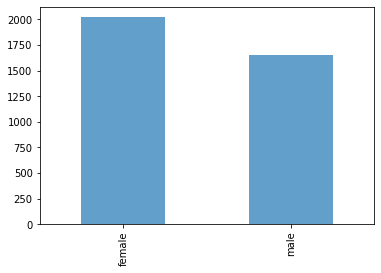

In [8]:
#성별 인원수 체크 
sex_counts = pa_df.sex.value_counts()
sex_counts.sort_values(ascending= False)
sex_counts.plot.bar(sex_counts,alpha = 0.7)

'''
남성이 여성 보다 감염 인원수가 작음을 확인 할수 있음 
'''

'\n사회적으로 활동을 많이 하는 20대 청년들 + 30~50 대 직장인 분들이 감염자 가 많음 \n\n10대는 왜 적냐..? -> 학교 집에서 수업 , 부모들이 보호 \n'

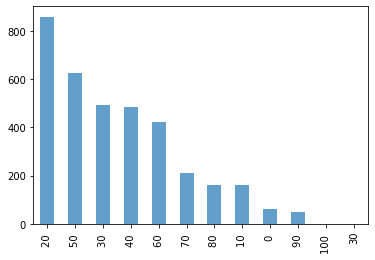

In [9]:
#나이 대별 인원수 체크 
pa_df['age'] = pa_df.age.str.replace('s', ' ')
pa_df.age
age_counts = pa_df.age.value_counts()
age_counts.sort_values(ascending= False)

age_counts.plot.bar(age_counts,alpha = 0.7)
'''
사회적으로 활동을 많이 하는 20대 청년들 + 30~50 대 직장인 분들이 감염자 가 많음 

10대는 왜 적냐..? -> 학교 집에서 수업 , 부모들이 보호 
'''


'\n한국인이 더 많은 감염 : 당연히 한국에서 측정한 자료이기 때문에 \n'

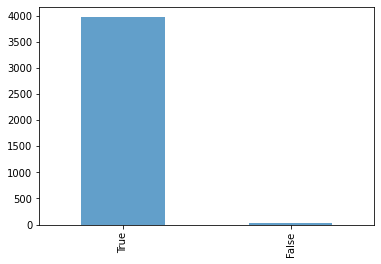

In [10]:
#국적 : 한국 자료 이기떄문에 한국인 인가 아닌가만 판단
korean_counts = (pa_df.country == 'Korea').value_counts()
korean_counts.sort_values(ascending= False)

korean_counts.plot.bar(korean_counts,alpha = 0.7)
'''
한국인이 더 많은 감염 : 당연히 한국에서 측정한 자료이기 때문에 
'''

'\n경상북도가 제일 많다..= 신천지 인가... ㅅㅂ\n'

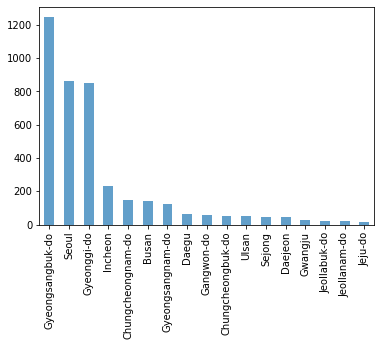

In [11]:
#region 지역별 시각화 (광역시, 도 중심)
province_counts = pa_df.province.value_counts()
province_counts.sort_values(ascending= False)
province_counts.plot.bar(province_counts,alpha = 0.7)
'''
경상북도가 제일 많다..= 신천지 인가... ㅅㅂ
'''

'\n경산시 \n성남시 \n부천시 \n천안시 \n용인시 \n구미시\n강남구 \n기타 \n봉화군\n수원시 \n'

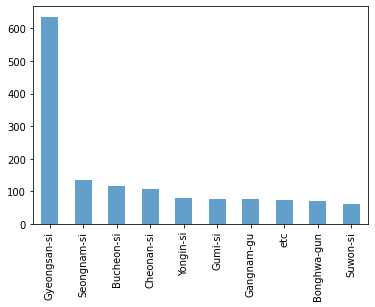

In [12]:
#city 별 시각화 
city_counts = pa_df.city.value_counts()
city_counts.sort_values(ascending= False)
city_counts[:10].plot.bar(city_counts,alpha = 0.7)

'''
경산시 
성남시 
부천시 
천안시 
용인시 
구미시
강남구 
기타 
봉화군
수원시 
'''

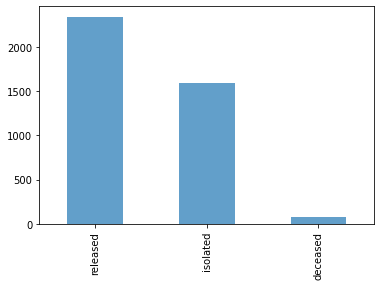

In [13]:
#환자 상태별 수치
state_counts = pa_df.state.value_counts()
state_counts.sort_values(ascending = False)
state_counts.plot.bar(alpha = 0.7)

##두개이상의 데이터 조화 
나이 - 성별 
나이 - 사망율
성별 - 사망율 
지역별 - 사망율 
도시별 top 10 -사망율 

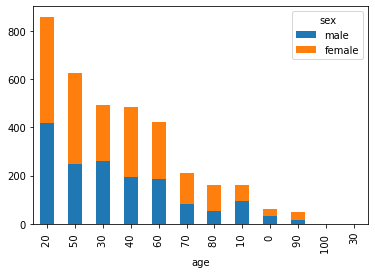

In [14]:
#나이 - 성별 
pa_df.age,pa_df.sex
age_sex = pd.crosstab(pa_df.age,pa_df.sex)
age_sex['total'] = age_sex.female + age_sex.male

age_sex.sort_values(by = 'total',ascending=False)[['male','female']].plot.bar(stacked = True)

plt.show()

'\n80대 노년층 분들이 사망율이 제일 높은것을 확인 할수 있다.\n'

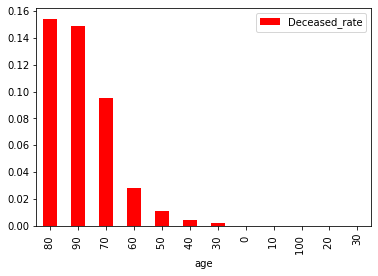

In [15]:
#나이 - 사망율 
age_deceased = pd.crosstab(pa_df.age,pa_df.state == 'deceased')
age_deceased.columns = ['Not_Deceased' ,'Deceased']
age_deceased['Deceased_rate'] = age_deceased.Deceased / (age_deceased.Not_Deceased + age_deceased.Deceased)

age_deceased.sort_values(by = 'Deceased_rate',ascending=False)[['Deceased_rate']].plot.bar(color = 'red')

age_deceased

'''
80대 노년층 분들이 사망율이 제일 높은것을 확인 할수 있다.
'''

'\n남성의 사망율이 높은 것으로 확인 \n'

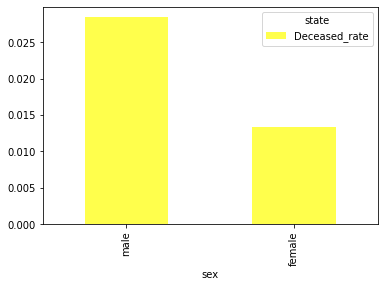

In [16]:
#성별 사망율 
sex_deceased = pd.crosstab(pa_df.sex,pa_df.state == 'deceased')
sex_deceased.rename(columns={False:'Not_Deceased',True : 'Deceased'},inplace=True)
sex_deceased['Deceased_rate'] = sex_deceased.Deceased / (sex_deceased.Not_Deceased + sex_deceased.Deceased)
sex_deceased.sort_values(by = 'Deceased_rate',ascending=False)[['Deceased_rate']].plot.bar(color = 'yellow',alpha = 0.7)
sex_deceased
'''
남성의 사망율이 높은 것으로 확인 
'''

'\n작년 코로나 데이터는 대구의 신천지 떄문에 사망비율이 제일 높은것으로 확인 되었다 \n그 외에도 강원도 경상북도 부산 울산 서울 순으로 사망율이 높다 \n'

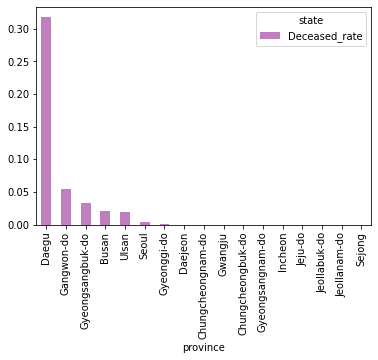

In [17]:
#지역별 사망율 
pa_df.province
pa_df.state == 'deceased'

province_state= pd.crosstab(pa_df.province,pa_df.state == 'deceased')
province_state.rename(columns = {False:'Not_Deceased',True:'Deceased'},inplace=True)
province_state['Deceased_rate'] = province_state.Deceased / (province_state.Not_Deceased + province_state.Deceased)

province_state.sort_values(by ='Deceased_rate',ascending=False)[['Deceased_rate']].plot.bar(color = 'purple',alpha = 0.5)
'''
작년 코로나 데이터는 대구의 신천지 떄문에 사망비율이 제일 높은것으로 확인 되었다 
그 외에도 강원도 경상북도 부산 울산 서울 순으로 사망율이 높다 
'''



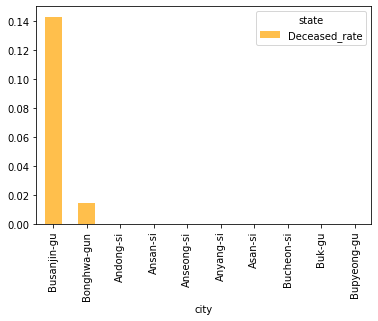

In [18]:
#도시 top 10 사망비율 
pa_df.city
pa_df.state == 'deceased'

city_state = pd.crosstab(pa_df.city,pa_df.state == 'deceased')
city_state.rename(columns = {False:'Not_Deceased',True:'Deceased'},inplace=True)
city_state['Deceased_rate'] = city_state.Deceased/(city_state.Not_Deceased+city_state.Deceased)
city_state[:10].sort_values(by = 'Deceased_rate',ascending = False)[['Deceased_rate']].plot.bar(color = 'orange',alpha = 0.7)

In [19]:
pa_df[pa_df.city == 'Busanjin-gu'].state
# 2명 사망이 제일 크게 뜬다.

916     released
918     released
933     deceased
937     released
945     released
954     released
959     deceased
960     isolated
961     released
962     released
963     released
965     released
978     released
1000    isolated
Name: state, dtype: object

##감염 경로 유형 확인 

In [20]:
print(pa_df.infection_case.unique()) #감염 경로 유형 정리 
print(pa_df.infection_case.nunique()) #29가지의 감영 유형 경로 가 있다 


['overseas inflow' 'contact with patient' 'Seongdong-gu APT' 'etc'
 "Eunpyeong St. Mary's Hospital" 'Shincheonji Church' 'Dongan Church'
 'Guro-gu Call Center' nan 'Itaewon Clubs' 'Samsung Medical Center'
 'Coupang Logistics Center' 'Guri Collective Infection'
 'KB Life Insurance' 'Yeongdeungpo Learning Institute' 'Onchun Church'
 'Cheongdo Daenam Hospital' 'Suyeong-gu Kindergarten'
 'Ministry of Oceans and Fisheries' 'gym facility in Cheonan'
 'gym facility in Sejong' 'River of Grace Community Church'
 'Gyeongsan Seorin Nursing Home' 'Gyeongsan Cham Joeun Community Center'
 'Gyeongsan Jeil Silver Town' 'Bonghwa Pureun Nursing Home'
 'Pilgrimage to Israel' 'Milal Shelter' 'Geochang Church'
 'Changnyeong Coin Karaoke']
29


                           infection_case  counts
0                    contact with patient    1182
1                         overseas inflow     703
2                                     etc     601
3                           Itaewon Clubs     156
4                     Guro-gu Call Center     112
5                      Shincheonji Church     107
6                Coupang Logistics Center      70
7                           Onchun Church      33
8             Bonghwa Pureun Nursing Home      31
9                 gym facility in Cheonan      30
10       Ministry of Oceans and Fisheries      28
11               Cheongdo Daenam Hospital      21
12                          Dongan Church      17
13          Eunpyeong St. Mary's Hospital      16
14          Gyeongsan Seorin Nursing Home      15
15                       Seongdong-gu APT      13
16             Gyeongsan Jeil Silver Town      12
17                          Milal Shelter      11
18  Gyeongsan Cham Joeun Community Center      10


'\n환자 끼리 의 접촉이 가장 많은 것으로 확인 할수 있다.\n'

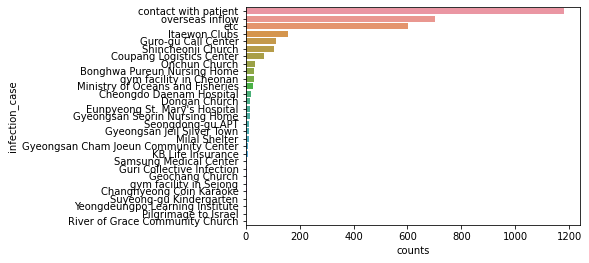

In [21]:
#29가지 를 바 차트 로 먼저 시각화 
infection_case29 = pa_df.groupby(['infection_case'])['patient_id'].count()
infection_case29 = infection_case29.sort_values(ascending=False)
infection_case29 = infection_case29.reset_index()
infection_case29.rename(columns = {'patient_id':'counts'},inplace = True)


sns.barplot(data = infection_case29,x = 'counts',y = 'infection_case')
print(infection_case29)

'''
환자 끼리 의 접촉이 가장 많은 것으로 확인 할수 있다.
'''

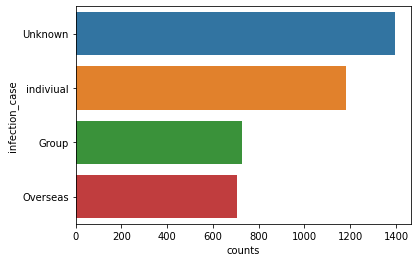

In [22]:
#감염 유형이 너무 많아서 그룹화 를 시킴 
'''
contact with patient:indiviual
etc:Unknown
overseas inflow :Overseas
나머지 항목 : Group
'''

case_dict = {'contact with patient':'indiviual','etc':'Unknown','overseas inflow':'Overseas'}

res = pa_df.infection_case.apply(lambda x:case_dict[x] if x in case_dict.keys() else 'Group' if not pd.isnull(x) else 'Unknown')
#print(res)

pa_df['infection_case_group'] = res

res = res.value_counts().sort_values(ascending = False)
res = res.reset_index() #columns 을 만들어 주기 위해 index reset
res.rename(columns = {'index':'infection_case','infection_case':'counts'},inplace= True) #columns 의 이름 변경 

sns.barplot(data = res,x = 'counts',y = 'infection_case') #데이터를 가로 바 차트 로 넣기 




##4.유동성 


In [23]:
pa_df2 = pd.read_csv('/content/drive/MyDrive/인공지능사관학교/빅데이터/별첨 2_DACON_코로나 데이터 분석/data/PatientRoute.csv')

In [24]:
pa_df2.head(5)

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534


In [25]:
print(pa_df2.isnull().sum())
#global_num 의 null 값만 3264 개 있다.

print(pa_df2.isnull().sum().sum())



patient_id       0
global_num    3264
date             0
province         0
city             0
type             0
latitude         0
longitude        0
dtype: int64
3264


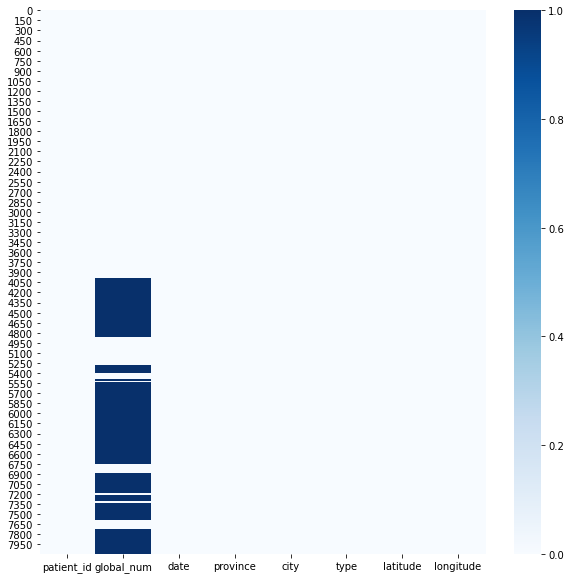

In [26]:
#결측치를 시각화 
plt.figure(figsize = (10,10))
sns.heatmap(pa_df2.isnull(),cmap = 'Blues',cbar = True) 
plt.show()

In [27]:
pa_df2.patient_id.unique()

pa_df2.patient_id.nunique()

1472

In [28]:
pa_df2.type.unique()


array(['airport', 'hospital', 'etc', 'store', 'public_transportation',
       'restaurant', 'church', 'beauty_salon', 'pharmacy', 'pc_cafe',
       'bank', 'academy', 'cafe', 'bakery', 'bar', 'gym', 'school',
       'real_estate_agency', 'karaoke', 'post_office', 'gas_station',
       'park', 'lodging', 'university', 'administrative_area_level_1'],
      dtype=object)

In [29]:
# 이동 경로의 유형을 카테고리로 표현해 본다.
leisure = ['library', 'theater', 'cafe', 'bakery', 'beauty_salon', #도서관 극장 카페 빵집 미용실 피시방 ... = 여가를 즐기는 곳
          'pc_cafe', 'billiards','restaurant', 'bar', 'karaoke'] 
travel = ['airport', 'lodging']    #여행 시설 공항, 배 
essential_edu = ['primary_school', 'school', 'university'] #교육시설
non_essential_edu = ['academy'] #학원 = 가도되고 안가도됌
exercise = ['gym', 'mountain', 'park']  #운동 시설
essential_admin = ['administrative_area_level_1', 'governmnet_office', 'post_office'] #우체국 등등 공공 시설
non_essential_admin = ['police_office', 'bank', 'real_estate_agency'] #경찰서 은행 등 자주 안가는 곳
necessity = ['store', 'public_transportation', 'gas_station'] #마트 주유소 공공 교통 시설
medical = ['hospital', 'pharmacy'] #병원 의원
church = ['church'] #교회
etc = ['etc'] #그외 등등 




In [30]:
#필수적인 카테고리와 덜 필수적인 카테고리를 나눈다 

essential  =  essential_edu + essential_admin + necessity + medical

print(essential)




['primary_school', 'school', 'university', 'administrative_area_level_1', 'governmnet_office', 'post_office', 'store', 'public_transportation', 'gas_station', 'hospital', 'pharmacy']


In [31]:
#필수적인 요소와 비 필수 적인 요소를 나눈다 . 

def isessential(x):
    if x in essential:
      res = True
    else:
      res = False
    return res
pa_df2['is_essential'] = pa_df2['type'].apply(lambda x: isessential(x))

#데이터 프레임 간추리기 
pa_df2 = pa_df2[['patient_id','type','is_essential']]
pa_df2.head()

,patient_id,type,is_essential
0,1000000001,airport,False
1,1000000001,hospital,True
2,1000000002,etc,False
3,1000000002,store,True
4,1000000002,public_transportation,True


In [32]:
#집계 대상 
pa_df2['route_value'] = 1
pa_df2

,patient_id,type,is_essential,route_value
0,1000000001,airport,False,1
1,1000000001,hospital,True,1
2,1000000002,etc,False,1
3,1000000002,store,True,1
4,1000000002,public_transportation,True,1
...,...,...,...,...
8087,6100000090,airport,False,1
8088,6100000090,airport,False,1
8089,6100000090,store,True,1
8090,6100000090,hospital,True,1


In [33]:
#pa_df 3 
pa_df3 = pd.pivot_table(data = pa_df2 , index = "patient_id",columns = "is_essential",values = "route_value",aggfunc = "sum",fill_value = 0) #중복 되지 않게 환자의 동선을 필수 적인 곳과 아닌곳의 카운트 를 한다 
pa_df3.head()

is_essential,False,True
patient_id,,
1000000001,1,1
1000000002,4,9
1000000003,2,0
1000000004,0,1
1000000005,0,1


In [34]:
pa_df3.columns.name = None
pa_df3

,False,True
patient_id,,
1000000001,1,1
1000000002,4,9
1000000003,2,0
1000000004,0,1
1000000005,0,1
...,...,...
6100000086,2,2
6100000087,2,6
6100000088,19,5


In [35]:
pa_df3 = pa_df3.reset_index()

In [36]:
# columns  변경 

pa_df3 = pa_df3.rename(columns = {False:'Not_essential',True:'essential'})

In [37]:
pa_df3_join = pd.merge(pa_df,pa_df3,on = "patient_id",how = "inner") #inner 조인으로 기준이 되는 column 으로 병합 

In [38]:
pa_df3_join

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infection_case_group,Not_essential,essential
0,1000000001,2.0,male,1964,50,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,Overseas,1,1
1,1000000002,5.0,male,1987,30,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,Overseas,4,9
2,1000000003,6.0,male,1964,50,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,indiviual,2,0
3,1000000004,7.0,male,1991,20,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,Overseas,0,1
4,1000000005,9.0,female,1992,20,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,indiviual,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,6100000086,NaN,male,1966,50,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,NaN,NaN,NaN,2020-03-15,2020-03-19,NaN,NaN,isolated,Unknown,2,2
1468,6100000087,NaN,female,1967,50,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,NaN,NaN,NaN,2020-03-16,2020-03-21,NaN,NaN,isolated,Unknown,2,6
1469,6100000088,NaN,male,1994,20,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,NaN,NaN,NaN,2020-03-06,2020-03-22,2020-04-19,NaN,released,Unknown,19,5
1470,6100000089,NaN,male,1960,60,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,NaN,6002000035,NaN,2020-03-22,2020-03-23,NaN,NaN,released,Unknown,1,1


## 5.접촉 빈도 


In [39]:
res = pa_df3_join.contact_number

In [40]:
res.isnull().sum() #접촉 빈도 에서 한번도 접촉이 없는 사람 이 1103 

1103

In [41]:
pa_df_join = pa_df3_join[~res.isnull() & (res!= '-')] 


In [42]:
pa_df_join.contact_number.isnull().sum()

0

In [43]:
pa_df_join.contact_number.unique()

array(['75', '31', '17', '9', '2', '43', '0', '68', '6', '23', '117',
       '27', '8', '3', '1', '1000000772', '1000000796', '1091', '131',
       '16', '14', '4', '19', '296', '15', '34', '37', '22', '7', '10',
       '28', '21', '5', '25', '18', '11', '30', '41', '71', '38', '13',
       '24', '185', '160', '1160', '450', '65', '156', '39', '47', '86',
       '74', '12', '40', '95', '290', '32', '45', '35', '51', '130', '53',
       '106', '174', '78', '89', '113'], dtype=object)

In [44]:
#contact number int 형으로 변경
pa_df_join['contact_number'] = pa_df_join.contact_number.astype(int)

In [45]:
#contact_number 의 수를 10000 이하 만 저장
pa_df_join = pa_df_join[pa_df_join.contact_number <10000]

In [46]:
pa_df_join.contact_number.unique()

array([  75,   31,   17,    9,    2,   43,    0,   68,    6,   23,  117,
         27,    8,    3,    1, 1091,  131,   16,   14,    4,   19,  296,
         15,   34,   37,   22,    7,   10,   28,   21,    5,   25,   18,
         11,   30,   41,   71,   38,   13,   24,  185,  160, 1160,  450,
         65,  156,   39,   47,   86,   74,   12,   40,   95,  290,   32,
         45,   35,   51,  130,   53,  106,  174,   78,   89,  113])

In [47]:
print(pa_df_join.contact_number)

0       75
1       31
2       17
3        9
4        2
        ..
1242     4
1244     2
1246     1
1317    11
1318     3
Name: contact_number, Length: 366, dtype: int64


In [48]:
#최다 접촉자 정보 확인 
pa_df_join[pa_df_join.contact_number == pa_df_join.contact_number.max()]
#1160 번 =  신천지 교회 환자.

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infection_case_group,Not_essential,essential
901,1200000031,31.0,female,1959,60,Korea,Daegu,NaN,NaN,Shincheonji Church,NaN,NaN,1160,NaN,2020-02-18,NaN,NaN,isolated,Group,5,11


(array([298.,  39.,   6.,   7.,   3.,   4.,   2.,   2.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([   0. ,   23.2,   46.4,   69.6,   92.8,  116. ,  139.2,  162.4,
         185.6,  208.8,  232. ,  255.2,  278.4,  301.6,  324.8,  348. ,
         371.2,  394.4,  417.6,  440.8,  464. ,  487.2,  510.4,  533.6,
         556.8,  580. ,  603.2,  626.4,  649.6,  672.8,  696. ,  719.2,
         742.4,  765.6,  788.8,  812. ,  835.2,  858.4,  881.6,  904.8,
         928. ,  951.2,  974.4,  997.6, 1020.8, 1044. , 1067.2, 1090.4,
        1113.6, 1136.8, 1160. ]),
 <a list of 50 Patch objects>)

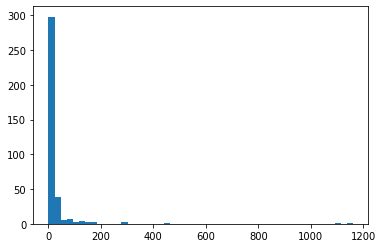

In [49]:
#contact number histogram 화 

plt.hist(pa_df_join.contact_number,bins = 50)

##군집화 

In [50]:
pa_df_join

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infection_case_group,Not_essential,essential
0,1000000001,2.0,male,1964,50,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,Overseas,1,1
1,1000000002,5.0,male,1987,30,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,Overseas,4,9
2,1000000003,6.0,male,1964,50,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,indiviual,2,0
3,1000000004,7.0,male,1991,20,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,Overseas,0,1
4,1000000005,9.0,female,1992,20,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,indiviual,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,6001000045,1200.0,male,1938,80,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,NaN,NaN,NaN,4,NaN,2020-02-25,2020-03-13,NaN,released,Unknown,0,4
1244,6001000061,1199.0,male,1991,20,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,NaN,NaN,NaN,2,2020-02-22,2020-02-26,2020-04-11,NaN,released,Unknown,3,1
1246,6001000063,1222.0,female,1956,60,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,NaN,NaN,NaN,1,NaN,2020-02-26,2020-04-01,NaN,released,Unknown,0,1
1317,6014000001,NaN,female,1959,60,Korea,Gyeongsangbuk-do,Yeongju-si,NaN,NaN,NaN,NaN,11,NaN,2020-02-22,2020-03-05,NaN,released,Unknown,4,1


In [51]:
pa_df4 = pa_df_join[['patient_id','contact_number','essential','Not_essential','infection_case_group']] 
'''
환자 번호 접촉 인원 수 필수적인 요소 방문 횟수 /필수적이지 않은 곳 방문 횟수 감염 경로 



'''
pa_df4.head(50)

,patient_id,contact_number,essential,Not_essential,infection_case_group
0,1000000001,75,1,1,Overseas
1,1000000002,31,9,4,Overseas
2,1000000003,17,0,2,indiviual
3,1000000004,9,1,0,Overseas
4,1000000005,2,1,0,indiviual
5,1000000006,43,0,1,indiviual
6,1000000007,0,0,1,indiviual
7,1000000008,0,1,0,Overseas
8,1000000009,68,3,7,Overseas
9,1000000010,6,2,2,indiviual


In [52]:
pa_df4 = pa_df4.join(pd.get_dummies(pa_df_join.infection_case_group,prefix = "infection",drop_first = False))
pa_df_final = pa_df4[['patient_id','contact_number','essential','Not_essential','infection_Group','infection_indiviual','infection_Overseas','infection_Unknown']]

In [53]:
pa_df4

,patient_id,contact_number,essential,Not_essential,infection_case_group,infection_Group,infection_Overseas,infection_Unknown,infection_indiviual
0,1000000001,75,1,1,Overseas,0,1,0,0
1,1000000002,31,9,4,Overseas,0,1,0,0
2,1000000003,17,0,2,indiviual,0,0,0,1
3,1000000004,9,1,0,Overseas,0,1,0,0
4,1000000005,2,1,0,indiviual,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1242,6001000045,4,4,0,Unknown,0,0,1,0
1244,6001000061,2,1,3,Unknown,0,0,1,0
1246,6001000063,1,1,0,Unknown,0,0,1,0
1317,6014000001,11,1,4,Unknown,0,0,1,0


In [57]:
X = pa_df_final.values
my_scaler = StandardScaler()



In [58]:
X

array([[1000000001,         75,          1, ...,          0,          1,
                 0],
       [1000000002,         31,          9, ...,          0,          1,
                 0],
       [1000000003,         17,          0, ...,          1,          0,
                 0],
       ...,
       [6001000063,          1,          1, ...,          0,          0,
                 1],
       [6014000001,         11,          1, ...,          0,          0,
                 1],
       [6014000002,          3,          2, ...,          0,          0,
                 1]])

In [60]:
X = my_scaler.fit_transform(X)
pd.DataFrame(X,columns = pa_df_final.columns)

,patient_id,contact_number,essential,Not_essential,infection_Group,infection_indiviual,infection_Overseas,infection_Unknown
0,-0.942506,0.564896,-0.753874,-0.516256,-0.545777,-0.791623,2.074692,-0.494872
1,-0.942506,0.082599,2.205031,0.091951,-0.545777,-0.791623,2.074692,-0.494872
2,-0.942506,-0.070859,-1.123737,-0.313521,-0.545777,1.263228,-0.481999,-0.494872
3,-0.942506,-0.158549,-0.753874,-0.718992,-0.545777,-0.791623,2.074692,-0.494872
4,-0.942506,-0.235278,-0.753874,-0.718992,-0.545777,1.263228,-0.481999,-0.494872
...,...,...,...,...,...,...,...,...
361,1.996343,-0.213356,0.355715,-0.718992,-0.545777,-0.791623,-0.481999,2.020726
362,1.996343,-0.235278,-0.753874,-0.110785,-0.545777,-0.791623,-0.481999,2.020726
363,1.996343,-0.246240,-0.753874,-0.718992,-0.545777,-0.791623,-0.481999,2.020726
364,2.003983,-0.136627,-0.753874,0.091951,-0.545777,-0.791623,-0.481999,2.020726


In [61]:
#kmeans 군집화 
kmean = KMeans(n_clusters= 4 ,random_state = 123)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [65]:
# 군집의 수 = 4로 정하고 군집화를 실행한다.  <= 군집의 수 최적화가 선행되어야 한다! (부록 참고)
my_km = KMeans(n_clusters = 4, random_state = 123)
my_km.fit(X)

my_centroids = my_km.cluster_centers_               # 개개 군집의 중심점.
my_cluster_labels = my_km.labels_      

In [66]:
# PCA 차원축소 (2차원).
my_pca = PCA(n_components = 2)
transformed_comps = my_pca.fit_transform(X)         # Transformed 된 좌표.
df_transformed_comps = pd.DataFrame(data = transformed_comps, columns = ['PC1', 'PC2'])
df_transformed_comps=df_transformed_comps.join(pd.Series(my_cluster_labels, name='cluster_label'))
df_transformed_comps

,PC1,PC2,cluster_label
0,0.339573,-2.044649,3
1,1.724801,-1.430695,3
2,-0.878765,-1.048256,0
3,-0.016654,-2.185189,3
4,-0.914014,-1.125978,0
...,...,...,...
361,-1.443665,2.149996,1
362,-1.752723,2.145424,1
363,-1.968335,1.963704,1
364,-1.646094,2.220332,1


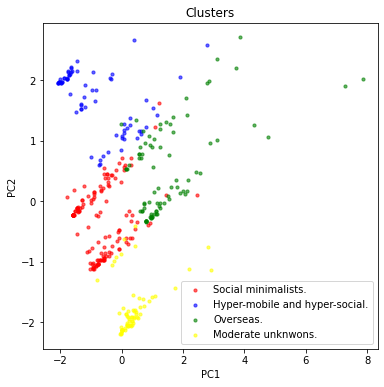

In [67]:
# 산점도 시각화.
my_colors = {0:'red',1:'blue',2:'green',3:'yellow'}    # 군집 label => Color.
my_names = { 0: 'Social minimalists.', 1: 'Hyper-mobile and hyper-social.', 2: 'Overseas.', 3: 'Moderate unknwons.' } # 군집 label => 명칭.

plt.figure(figsize = (6,6))
for a_cluster_n, df_small in df_transformed_comps.groupby('cluster_label'):
    plt.scatter('PC1', 'PC2', data = df_small, c = my_colors[a_cluster_n], label = my_names[a_cluster_n], s = 10, alpha=0.6 )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters')
plt.legend(loc=4)
plt.show()

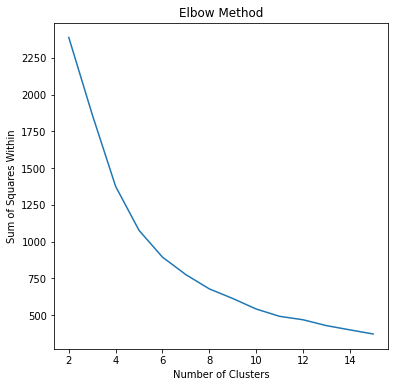

In [68]:
# 군집의 수를 키워가며 Sum of Squares Within을 계산한다.
ssw = []
cluster_ns = range(2,16)
for n in cluster_ns:
    my_cluster = KMeans(n)
    my_cluster.fit(X)
    ssw += [my_cluster.inertia_]         # SSW를 모아둔다.

plt.figure(figsize = (6,6))
plt.plot(cluster_ns, ssw)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Within')
plt.show()

**결론**: 군집의 수가 5 이상일 때 SSW의 감소 속도가 둔화된다. => 군집의 적정 수 = 4.